this function computes the equilibrium climate sensitivity based on the estimates from Otto Nature Geo (2013) and our new ground heat flux estimates 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_MCMC  = 1000000
area_land  = 148300000; # km^2 Coble et al., 1987
area_Earth = 510064472
mu_T, Delta_T = 0.75,0.2
sigma_T = Delta_T/2
mu_OHS, Delta_OHS = 0.65,0.27
sigma_OHS = Delta_OHS/2
mu_RAD, Delta_RAD = 1.95,0.58
sigma_RAD = Delta_RAD/2
mu_RAD_CO2x, Delta_RAD_CO2x = 3.44,0.34
sigma_RAD_CO2x = Delta_RAD_CO2x/2
mu_GHS, Delta_GHS = 0.24,(0.08+0.16)/2 # 0.18*2
sigma_GHS = Delta_GHS/2
DeltaT   = np.random.normal(mu_T ,sigma_T ,N_MCMC)
OHS = np.random.normal(mu_OHS ,sigma_OHS ,N_MCMC)
RAD = np.random.normal(mu_RAD ,sigma_RAD ,N_MCMC)
RAD_CO2x = np.random.normal(mu_RAD_CO2x ,sigma_RAD_CO2x ,N_MCMC)
GHS = area_land/area_Earth*np.random.normal(mu_GHS ,sigma_GHS ,N_MCMC) # only applies over ~1/3rd of the globe

check distribution

now estimate lambda and its spread

In [3]:
lambda_est = -(OHS-RAD)/DeltaT

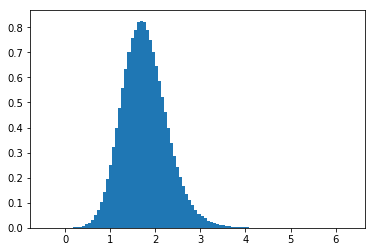

In [4]:
count, bins, ignored = plt.hist(lambda_est, 100, density=True)
#plt.plot(bins, 1/(sigma_OHS * np.sqrt(2 * np.pi)) *
#                   np.exp( - (bins - mu_OHS)**2 / (2 * sigma_OHS**2) ),
#                   linewidth=2, color='r')
plt.show()

now estimate TCR doubling CO2

In [5]:
indices_good = ~((OHS>RAD-0.1) | (OHS>RAD_CO2x-0.1) | (RAD>RAD_CO2x-0.3) | (OHS+GHS>RAD-0.1))
DeltaT_TCR = DeltaT[indices_good] * RAD_CO2x[indices_good] / ( RAD[indices_good] )
DeltaT_ECS = DeltaT[indices_good] * RAD_CO2x[indices_good] / ( RAD[indices_good] - OHS[indices_good])
DeltaT_ECS_with_GHF = DeltaT[indices_good] * RAD_CO2x[indices_good] / ( RAD[indices_good] - OHS[indices_good] - GHS[indices_good])

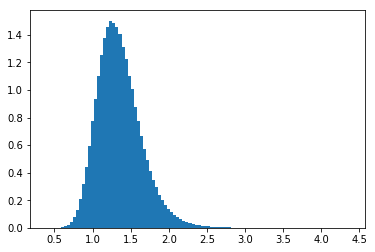

In [6]:
count, bins, ignored = plt.hist(DeltaT_TCR, 100, density=True)

In [7]:
np.mean(DeltaT_TCR),np.std(DeltaT_TCR), np.min(DeltaT_TCR),np.max(DeltaT_TCR)

(1.3545411341526896,
 0.2913272059544135,
 0.38170190208336513,
 4.376450277829174)

In [8]:
np.percentile(DeltaT_TCR, 5), np.percentile(DeltaT_TCR, 10),np.percentile(DeltaT_TCR, 95), np.percentile(DeltaT_TCR, 90) 

(0.9407891225749152,
 1.0154510821290672,
 1.8778815726365852,
 1.7326820139309325)

In [9]:
np.mean(DeltaT_ECS),np.std(DeltaT_ECS), np.min(DeltaT_ECS),np.max(DeltaT_ECS)

(2.135333651731879, 0.7652167067887492, 0.5350272726405247, 19.38074173813852)

In [10]:
np.percentile(DeltaT_ECS, 5), np.percentile(DeltaT_ECS, 10),np.percentile(DeltaT_ECS, 95), np.percentile(DeltaT_ECS, 90)

(1.290183164254417, 1.4130173419545313, 3.45603782381162, 2.9948177138278815)

In [11]:
np.mean(DeltaT_ECS_with_GHF),np.std(DeltaT_ECS_with_GHF), np.min(DeltaT_ECS),np.max(DeltaT_ECS_with_GHF)

(2.2837636367419236,
 0.9214575648860129,
 0.5350272726405247,
 33.691244870596286)

In [12]:
np.percentile(DeltaT_ECS_with_GHF, 5), np.percentile(DeltaT_ECS_with_GHF, 10),np.percentile(DeltaT_ECS_with_GHF, 95), np.percentile(DeltaT_ECS_with_GHF, 90)

(1.345049001654376, 1.475821446691046, 3.7896632506067176, 3.243759995377598)